# Now, using R...

In [12]:
#start R
thin=read.table("hapmap3_thin_pruned.mdist",F)
chr21=read.table("hapmap3_chr21_pruned.mdist",F)
all=read.table("hapmap3_pruned.mdist",F)

#install.packages("vegan")
install.packages("vegan", repos="http://r-forge.r-project.org/")
library(vegan)

#multidimensional scaling
thin_coord=cmdscale(thin,2)
chr21_coord=cmdscale(chr21,2)
all_coord=cmdscale(all,2)

Warning message:
In install.packages("vegan", repos = "http://r-forge.r-project.org/"): installation of package ‘vegan’ had non-zero exit status


The downloaded source packages are in
	‘/tmp/RtmpdQ7o6R/downloaded_packages’


Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


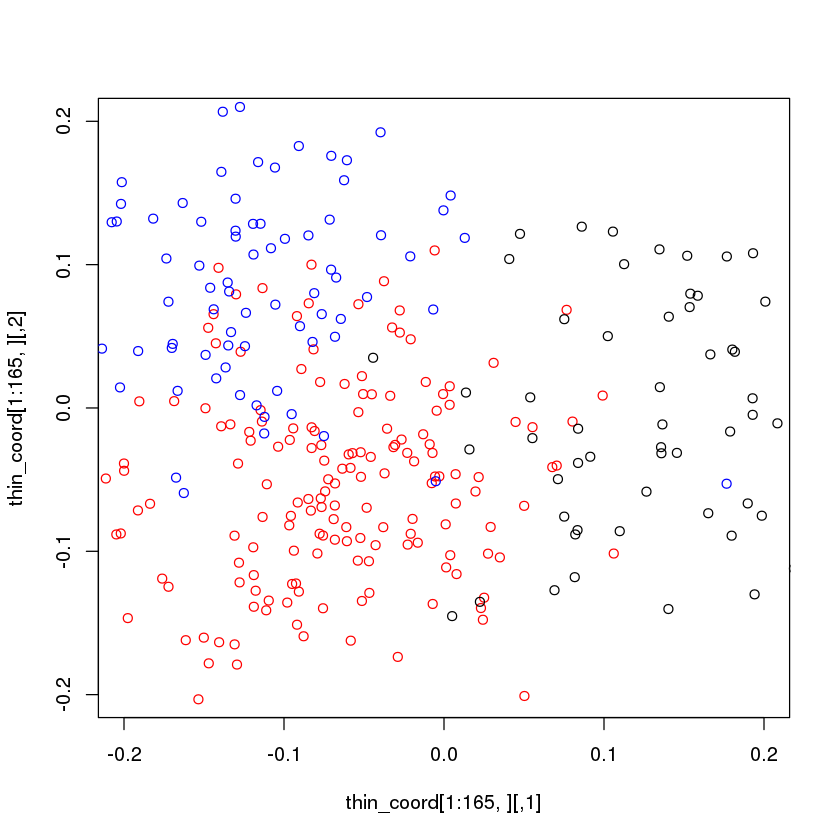

In [13]:

#plot
plot(thin_coord[1:165,],xlim=c(-0.2,0.2),ylim=c(-0.2,0.2),col="red")
points(thin_coord[166:250,],xlim=c(-0.2,0.2),ylim=c(-0.2,0.2),col="blue",type="p")
points(thin_coord[251:317,],xlim=c(-0.2,0.2),ylim=c(-0.2,0.2),type="p")

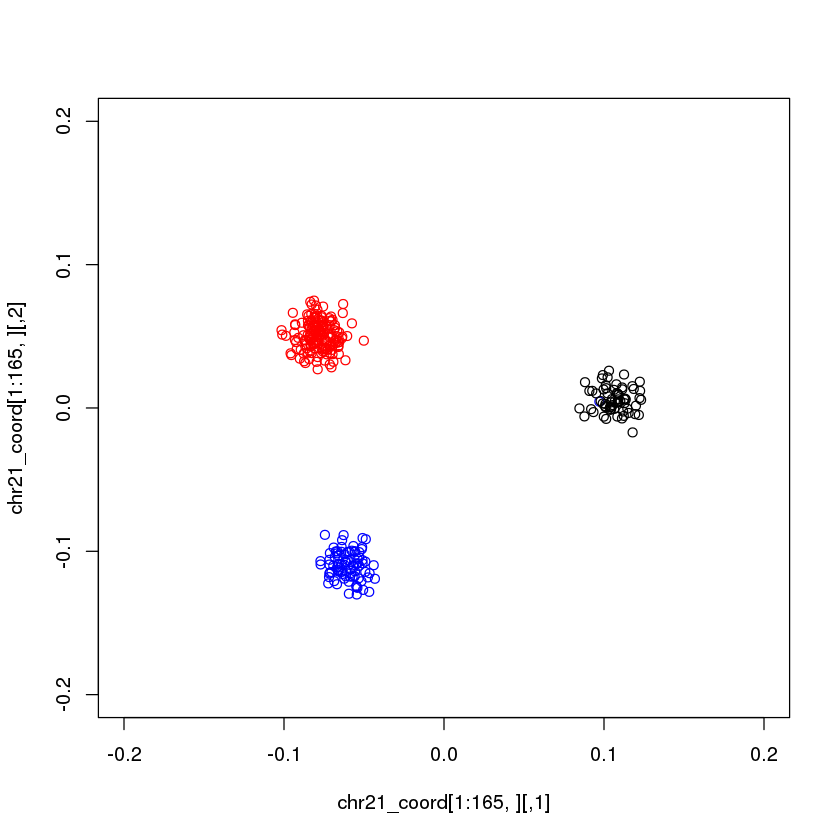

In [14]:
plot(chr21_coord[1:165,],xlim=c(-0.2,0.2),ylim=c(-0.2,0.2),col="red")
points(chr21_coord[166:250,],xlim=c(-0.2,0.2),ylim=c(-0.2,0.2),col="blue",type="p")
points(chr21_coord[251:317,],xlim=c(-0.2,0.2),ylim=c(-0.2,0.2),type="p")

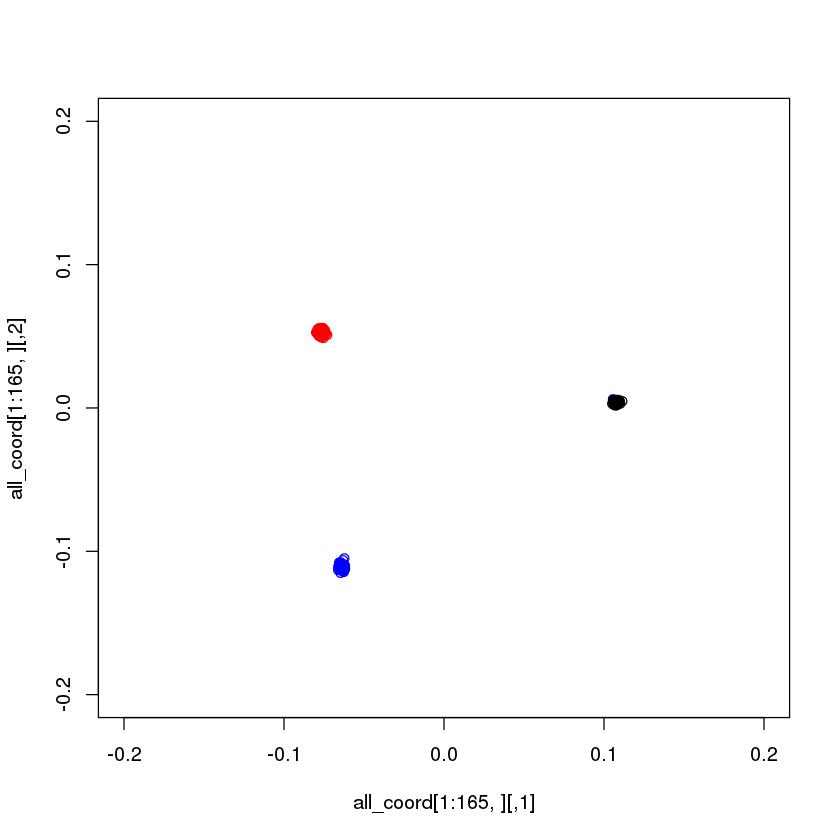

In [15]:
plot(all_coord[1:165,],xlim=c(-0.2,0.2),ylim=c(-0.2,0.2),col="red")
points(all_coord[166:250,],xlim=c(-0.2,0.2),ylim=c(-0.2,0.2),col="blue",type="p")
points(all_coord[251:317,],xlim=c(-0.2,0.2),ylim=c(-0.2,0.2),type="p")

### Other concerns:
* What if we didn't use SNPs but rarer variation?
* Only higher frequency?
* What if we used coding SNPs?
* What about other types of variation?
* What if the population were Italians, French and English? Would we need more or fewer markers?
* What about Mexicans and African Americans? would they cluster? 
* Why is this a problem in mapping? What are the solutions?

In [16]:
#grouping as a predictor:
pred=cbind(c(rep(1,165),rep(0,(416-165))), c(rep(0,165),rep(1,84),rep(0,(416-249))) ,c(rep(0,249),rep(1,(416-249))))

In [17]:
#GAMOVA
adonis(thin~pred)
adonis(chr21~pred)
adonis(all~pred)


Call:
adonis(formula = thin ~ pred) 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

           Df SumsOfSqs MeanSqs F.Model      R2 Pr(>F)    
pred        2    6.5125  3.2562  84.929 0.29142  0.001 ***
Residuals 413   15.8347  0.0383         0.70858           
Total     415   22.3471                 1.00000           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Call:
adonis(formula = chr21 ~ pred) 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

           Df SumsOfSqs MeanSqs F.Model      R2 Pr(>F)    
pred        2    4.6774  2.3387  53.643 0.20621  0.001 ***
Residuals 413   18.0058  0.0436         0.79379           
Total     415   22.6832                 1.00000           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Call:
adonis(formula = all ~ pred) 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

           Df SumsOfSqs MeanSqs F.Model     R2 Pr(>F)    
pred        2    4.7444  2.3722  55.424 0.2116  0.001 ***
Residuals 413   17.6769  0.0428         0.7884           
Total     415   22.4213                 1.0000           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [11]:
#random grouping
p=rep(c(0,1),208)
adonis(all~p)

#why do we get lots more variation explained?


Call:
adonis(formula = all ~ p) 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

           Df SumsOfSqs  MeanSqs F.Model      R2 Pr(>F)
p           1    0.0424 0.042418 0.78471 0.00189  0.957
Residuals 414   22.3789 0.054055         0.99811       
Total     415   22.4213                  1.00000       